# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np 
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
mice = combined_df["Mouse ID"].nunique()
mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ID = combined_df.loc[combined_df["Mouse ID"] == "g989", :]
duplicate_mouse_ID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_df = df.loc[df["Mouse ID"] == "g989"]
clean_df = combined_df.loc[combined_df['Mouse ID'].isin(['g989'])==False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
newmice = clean_df["Mouse ID"].nunique()
newmice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


In [8]:
#drugs_group = clean_df.groupby("Drug Regimen")
#print(drugs_group["Drug Regimen"].count())
#summary_statistics_gp = clean_df.groupby('Drug Regimen','Tumor Volume (mm3)')

summary_statistics_gp = clean_df.groupby('Drug Regimen')

mean = summary_statistics_gp['Tumor Volume (mm3)'].mean()
median = summary_statistics_gp['Tumor Volume (mm3)'].median()
var = summary_statistics_gp['Tumor Volume (mm3)'].var()
std = summary_statistics_gp['Tumor Volume (mm3)'].std()
sem = summary_statistics_gp['Tumor Volume (mm3)'].sem()
summstatistics_df = pd.DataFrame({'Mean Tumor Volume': mean,'Median Tumor Volume': median,'Tumor Volume Variance': var,'Tumor Volume Std. Dev.': std,'Tumor Volume Std. Err.': sem})


summstatistics_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_statistics_gp = clean_df.groupby('Drug Regimen')
aggregation_method_summary = summary_statistics_gp.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
aggregation_method_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [10]:
mice_countz = summary_statistics_gp["Mouse ID"].count().sort_values(ascending = False)
mice_countz

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Mouse ID, dtype: int64

Text(0, 0.5, 'Number of Mice Tested')

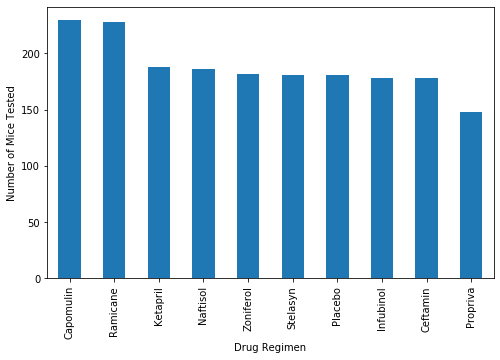

In [44]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
templot = mice_countz.plot(kind='bar',figsize= (8,5),width=0.5)
templot.set_xlabel('Drug Regimen')
templot.set_ylabel ('Number of Mice Tested')


In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#plt.bar(mice_countz, color='r',height = 100, alpha=0.5, align="center")




In [37]:
#x_axis = np.arange(len(mice_countz))
#tick_locations = [value for value in x_axis]

#plt.figure(figsize = (8,5))
#plt.bar(x_axis, mice_countz, width = 0.5)
#plt.xticks (tick_locations, mice_countz.index, rotation="vertical")


#plt.xlabel("Drug Regimen")
#plt.ylabel("Number of Mice Tested")


#plt.show()


Text(0, 0.5, 'Number of Mice Tested')

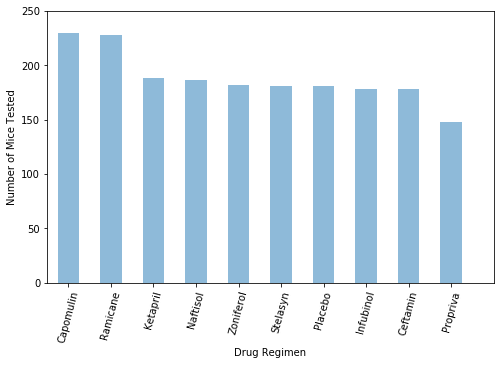

In [45]:
x_axis = np.arange(len(mice_countz))
y_axis = mice_countz

point = list(mice_countz.index.values)
tick_locations = [value for value in x_axis]

plt.figure(figsize=(8,5))
plt.bar(x_axis, y_axis, alpha=0.5, align="center", width =  0.5)
plt.xticks(tick_locations, tx, rotation="75")

plt.xlim(-0.5, len(x_axis))
plt.ylim(0, 250)

# Set a Title and labels
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#clean_df.groupby(["Sex"])["Mouse ID"].count().plot.pie(label="Sex",autopct="%1.1f%%")


In [15]:
mice_sex = clean_df["Sex"].count()
mice_sex

1880

In [16]:
specific_mice_sex = clean_df.groupby('Sex')['Sex'].count()
specific_mice_sex

Sex
Female    922
Male      958
Name: Sex, dtype: int64

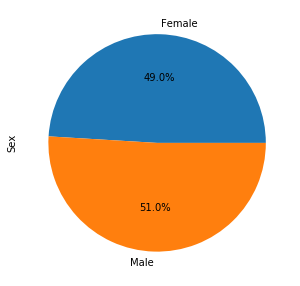

In [61]:
templot_pie = specific_mice_sex.plot(kind='pie',figsize= (8,5), autopct="%1.1f%%")


In [60]:
# Generate a pie plot showing the distribution of female versus male mice using plpot

(-1.1065502689644005,
 1.1003119175697333,
 -1.1041200173094385,
 1.1079114197007642)

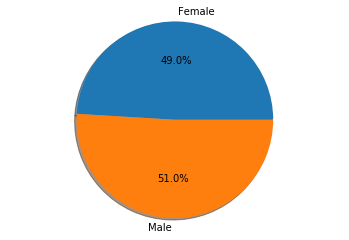

In [59]:
labels = list(specific_mice_sex.index)
explode = (0,0)
plt.pie(specific_mice_sex, explode=explode, labels=labels,
        autopct="%1.1f%%", shadow=True) 

plt.axis("equal")


## Quartiles, Outliers and Boxplots

In [119]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

greatest_timepoint =clean_df.groupby(['Mouse ID'])['Timepoint'].max()
greatest_timepoint = greatest_timepoint.reset_index()
greatest_timepoint.head()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30


In [118]:
#capomulin_regimens_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
#ramicane_regimens_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
#infubinol_regimens_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
#ceftamin_regimens_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]
#caplast = capomulin_regimens_df.groupby('Mouse ID').max()['Timepoint']
#cap_vol = pd.DataFrame(caplast)
#cap_merge = pd.merge(cap_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
#cap_merge.head()

In [135]:
final_m = greatest_timepoint.merge(clean_df, on=["Mouse ID", "Timepoint"], how="left")
final_m.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [136]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [144]:
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
total_tumor_vol = []
for drug in treatments:
    tumor_vol = final_m.loc[final_m["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    total_tumor_vol.append(tumor_vol)
    quartiles = tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq 
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


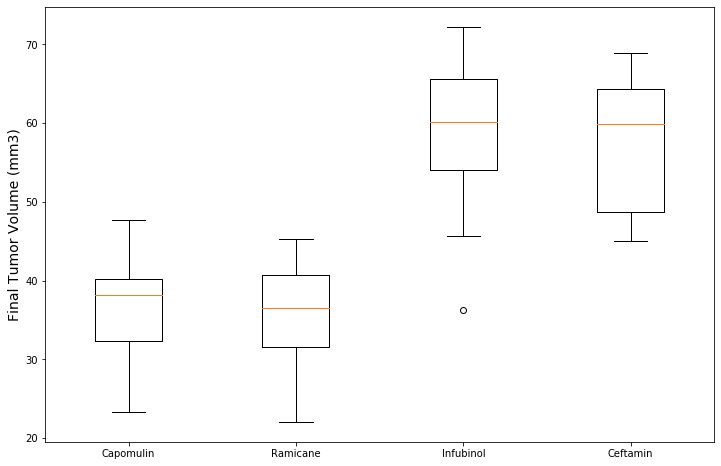

In [155]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
bptreatment 


fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.boxplot(total_tumor_vol, labels=treatments, widths = 0.4)
plt.show()

## Line and Scatter Plots

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


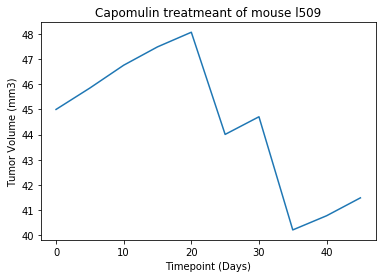

In [163]:
lineplot = clean_df.loc[clean_df["Mouse ID"] == "l509",:]
lineplot
x_axis = lineplot["Timepoint"] 
tumor_volume = lineplot["Tumor Volume (mm3)"] 

plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumor_volume) 
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

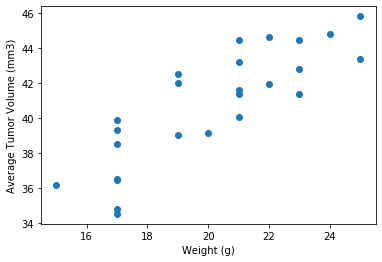

In [173]:
scatter_plot = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
average = scatter_plot.groupby(['Mouse ID']).mean()
plt.scatter(average['Weight (g)'],average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()


## Correlation and Regression

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
